In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show(img):
    plt.imshow(img)
    plt.show()

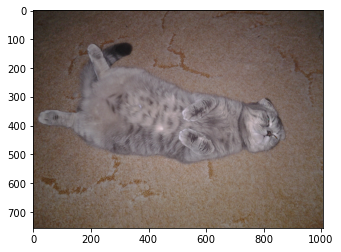

In [3]:
# Загружаем исходное изображение
img = cv.cvtColor(cv.imread('img/cat.jpg'), cv.COLOR_BGR2RGB)
show(img)

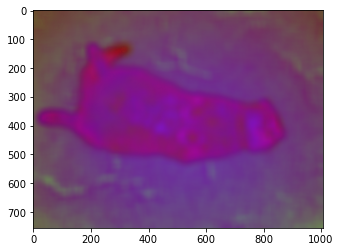

In [4]:
# Делаем размытия и переводим изобрадение в HSV
blur = cv.GaussianBlur(img, (33, 33), 20)
hsv = cv.cvtColor(blur, cv.COLOR_BGR2HSV)
show(hsv)

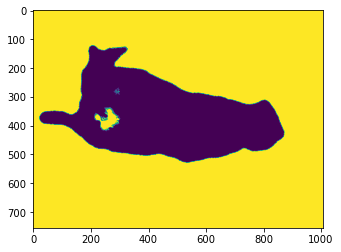

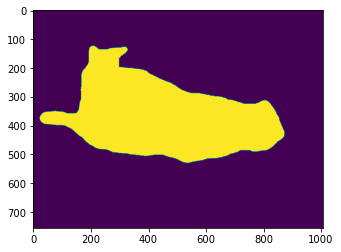

In [5]:
hsv_min = np.array((90, 25, 16), np.uint8)
hsv_max = np.array((120, 255, 255), np.uint8)

# Накладываем на изображение цветовой фильтр
thresh = cv.inRange(hsv, hsv_min, hsv_max)

show(thresh)

#Инвертируем цвета и применяем морфологию открытия
not_thersh = cv.bitwise_not(cv.morphologyEx(thresh, cv.MORPH_OPEN, np.ones((30, 30),np.uint8)))

show(not_thersh)


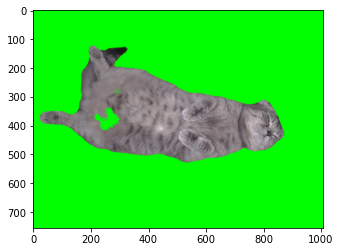

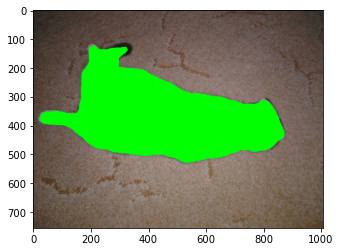

In [6]:
img_t = cv.cvtColor(cv.imread('img/cat.jpg'), cv.COLOR_BGR2RGB)
contours, heirarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img_t, contours, -1, (0,255,0), -1)
show(img_t)

img_t = cv.cvtColor(cv.imread('img/cat.jpg'), cv.COLOR_BGR2RGB)
contours, heirarchy = cv.findContours(not_thersh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img_t, contours, -1, (0,255,0), -1)
show(img_t)

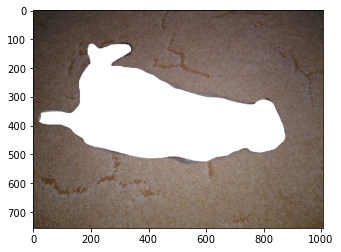

In [7]:
img_cont = cv.cvtColor(cv.imread('img/cat_cont.jpg'), cv.COLOR_BGR2RGB)
show(img_cont)

In [8]:
counter, greenCounter, whiteCounter = 0, 0, 0

for row in range(img_t.shape[0]):
    for col in range(img_t.shape[1]):
        isGreen, isWhite = False, False 
        # Если пиксель зеленый
        if img_t[row, col, 0] == 0 and img_t[row, col, 1] == 255 and img_t[row, col, 2] == 0:
            isGreen = True
        # Если пиксель белый 
        if img_cont[row, col, 0] == 255 and img_cont[row, col, 1] == 255 and img_cont[row, col, 2] == 255:
            isWhite = True
        if isWhite and isGreen:
            counter = counter + 1
        if isGreen:
            greenCounter = greenCounter + 1
        if isWhite:
            whiteCounter = whiteCounter + 1        

print(100 * 2 * counter / (greenCounter + whiteCounter))


95.82850788492674
